# Task(1): Data cleaning

## (1) Import titanic data

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
pd.set_option('expand_frame_repr', False) 
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(
    r'.\data.csv',
    encoding='utf8',
)
print(df)

     Survived    Pclass                                               Name     Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare
0           0  3 pclass                             Mr. Owen Harris Braund    male  22.0                        1                        0   7.2500
1           1  1 pclass  Mrs. John Bradley (Florence Briggs Thayer) Cum...  female  38.0                        1                        0  71.2833
2           1  3 pclass                              Miss. Laina Heikkinen  female  26.0                        0                        0   7.9250
3           1     1 pcl        Mrs. Jacques Heath (Lily May Peel) Futrelle     NaN  35.0                        1                        0  53.1000
4           0  3 pclass                            Mr. William Henry Allen    male  35.0                        0                        0   8.0500
..        ...       ...                                                ...     ...   ...                      ..

In [2]:
print(df.dtypes)

Survived                     int64
Pclass                      object
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object


In [3]:
print(df.describe())

         Survived         Age  Siblings/Spouses Aboard  Parents/Children Aboard           Fare
count  887.000000  887.000000               887.000000               887.000000     887.000000
mean     0.385569   31.336156                 0.466742                 0.331454   10517.085578
std      0.487004   28.162654                 1.130717                 0.830127   81274.234057
min      0.000000  -56.000000                -8.000000                -5.000000       0.000000
25%      0.000000   20.000000                 0.000000                 0.000000       7.925000
50%      0.000000   28.000000                 0.000000                 0.000000      14.500000
75%      1.000000   38.000000                 1.000000                 0.000000      31.387500
max      1.000000  240.000000                 8.000000                 6.000000  800069.550000


## (2)Visualizing and clean abnormal data

### 2.1 Plot a scatter plot of survived against age column

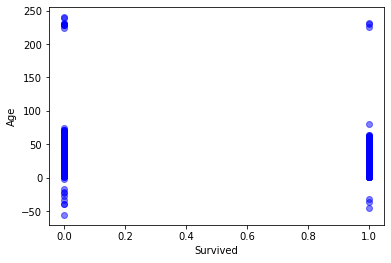

In [4]:
plt.scatter(df['Survived'], df['Age'], c='blue', alpha=0.5)
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

### clean abnormal data: It may not be possible for a person to have an age of less than 0 or greater than 100.

In [5]:
# ==> Create an array of indices where age is greater than 100
indice1 = df[df['Age'] > 100].index
# ==> Drop the records from the data based on the indices and create a new dataframe
df_01 = df.drop(indice1)
print(df_01.shape)

(875, 8)


In [6]:
# ==> Create an array of indices where age is less than 0
indice2 = df_01[df_01['Age'] < 0].index
# ==> Drop the records from the data based on the indices and create a new dataframe
df = df_01.drop(indice2)
print(df.shape)

(863, 8)


### 2.2 Plot a scatter plot of age against Parents/Children Aboard column

Text(0, 0.5, 'Parents/Children Aboard')

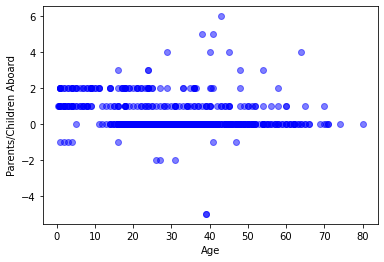

In [7]:
plt.scatter(df['Age'], df['Parents/Children Aboard'], c='blue', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Parents/Children Aboard")

### clean abnormal data: It may not be possible for a person to have the number of Parents/Children Aboard of less than 0.

In [8]:
# ==> Create an array of indices where Parents/Children Aboard is less than 0
indice1 = df[df['Parents/Children Aboard'] < 0].index
# ==> Drop the records from the data based on the indices and create a new dataframe
df = df.drop(indice1)
print(df.shape)

(851, 8)


### 2.3 Plot a scatter plot of age against Siblings/Spouses Aboard column

Text(0, 0.5, 'Siblings/Spouses Aboard')

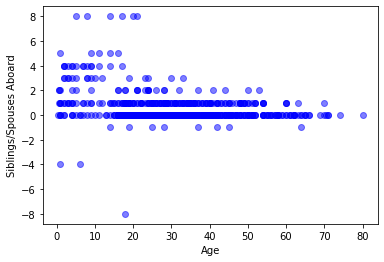

In [9]:
plt.scatter(df['Age'], df['Siblings/Spouses Aboard'], c='blue', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Siblings/Spouses Aboard")

### clean abnormal data: It may not be possible for a person to have the number of Siblings/Spouses Aboard of less than 0.

In [10]:
# ==> Create an array of indices where Siblings/Spouses Aboard is less than 0
indice1 = df[df['Siblings/Spouses Aboard'] < 0].index
# ==> Drop the records from the data based on the indices and create a new dataframe
df = df.drop(indice1)
print(df.shape)

(840, 8)


In [11]:
### 2.4 Plot a scatter plot of survived against fare column

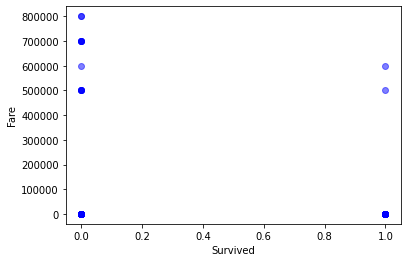

In [12]:
plt.scatter(df['Survived'], df['Fare'], c='blue', alpha=0.5)
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

In [13]:
print(df['Fare'].describe())

count       840.000000
mean      11103.153427
std       83480.806594
min           0.000000
25%           7.925000
50%          14.454200
75%          31.387500
max      800069.550000
Name: Fare, dtype: float64


### clean abnormal data: It may not be possible for a person to have the Fare of greater than 10000.

In [14]:
indice1 = df[df['Fare'] > 10000].index
df = df.drop(indice1)
print(df.shape)

(825, 8)


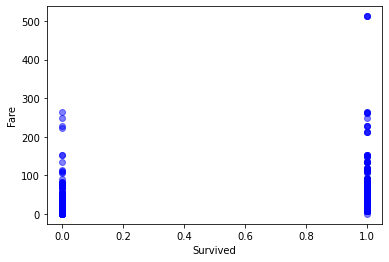

In [15]:
plt.scatter(df['Survived'], df['Fare'], c='blue', alpha=0.5)
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

## (3) processing missing (NaN) data

In [16]:
# Print the number of nulls
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())

Sex    12
dtype: int64


In [17]:
# Store the array on indices. Create an array of indices for rows that contain missing interest rate called indices.
indices = df[df['Sex'].isnull()].index
print(indices)

Int64Index([3, 15, 89, 265, 281, 298, 363, 401, 491, 495, 501, 526], dtype='int64')


In [18]:
df['Name'].str.strip()
df['Sex'].fillna((df['Name'].str[:4]), inplace=True)
print(df['Sex'].value_counts())

male      523
female    290
Mr.         7
Mrs.        3
Miss        2
Name: Sex, dtype: int64


In [19]:
df['Sex'].str.strip()
df['Sex'] = df['Sex'].replace({'Miss': 'female', 'Mrs.': 'female', 'Mr. ': 'male'})
print(df['Sex'].value_counts())

male      530
female    295
Name: Sex, dtype: int64


In [20]:
# format column Pclass
df['Pclass'].str.strip()
df['Pclass']=df['Pclass'].replace({'1 pcl':'1-pclass','1 pcla':'1-pclass','1 pclas':'1-pclass','1 pclass':'1-pclass','1-pcl':'1-pclass','1-pcla':'1-pclass','1-pclas':'1-pclass'})
df['Pclass']=df['Pclass'].replace({'2 pcl':'2-pclass','2 pcla':'2-pclass','2 pclas':'2-pclass','2 pclass':'2-pclass','2-pcla':'2-pclass','2-pclas':'2-pclass'})
df['Pclass']=df['Pclass'].replace({'3-pcla':'3-pclass','3 pcla':'3-pclass','3 pclas':'3-pclass','3 pclass':'3-pclass','3-pcl':'3-pclass','3-pclas':'3-pclass'})
print(df)

     Survived    Pclass                                               Name     Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare
0           0  3-pclass                             Mr. Owen Harris Braund    male  22.0                        1                        0   7.2500
1           1  1-pclass  Mrs. John Bradley (Florence Briggs Thayer) Cum...  female  38.0                        1                        0  71.2833
2           1  3-pclass                              Miss. Laina Heikkinen  female  26.0                        0                        0   7.9250
3           1  1-pclass        Mrs. Jacques Heath (Lily May Peel) Futrelle  female  35.0                        1                        0  53.1000
4           0  3-pclass                            Mr. William Henry Allen    male  35.0                        0                        0   8.0500
..        ...       ...                                                ...     ...   ...                      ..

# Task(2): How does the various factors impact survival: age, sex, social class etc?

## Survival by Age Analysis

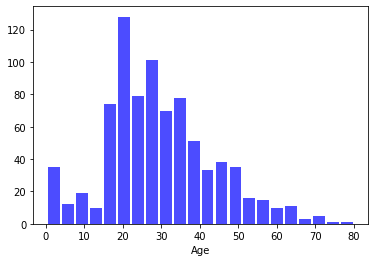

In [21]:
# ==> Look at the distribution of age by survival
n, bins, patches = plt.hist(x=df['Age'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Age")
plt.show()

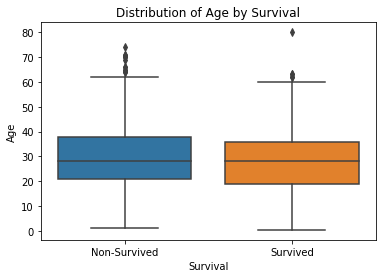

In [22]:
age_impact = sns.boxplot(data=df, x='Survived', y='Age')
age_impact.set(title='Distribution of Age by Survival', xlabel = 'Survival', ylabel = 'Age', xticklabels = ['Non-Survived', 'Survived'])
plt.show()

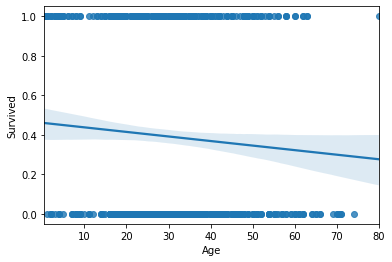

In [23]:
import seaborn as sns
age_impact = sns.regplot('Age','Survived',data = df)
plt.show()

### Age impact analysis: It looks like the age for the survived is slightly lower in the boxplot and the chances of survival decreased as age increased. This could indicate the younger are more likely to survive in the Titanic accident.

## Survival by Gender Analysis

In [24]:
# Create a cross table of the column Sex and Survived
print(pd.crosstab(df['Sex'], df['Survived'], margins=True,))

Survived    0    1  All
Sex                    
female     72  223  295
male      429  101  530
All       501  324  825


In [25]:
# Create a cross table of the column Sex and Survived by percentage
print(pd.crosstab(df['Sex'], df['Survived'], normalize='index'))

Survived         0         1
Sex                         
female    0.244068  0.755932
male      0.809434  0.190566


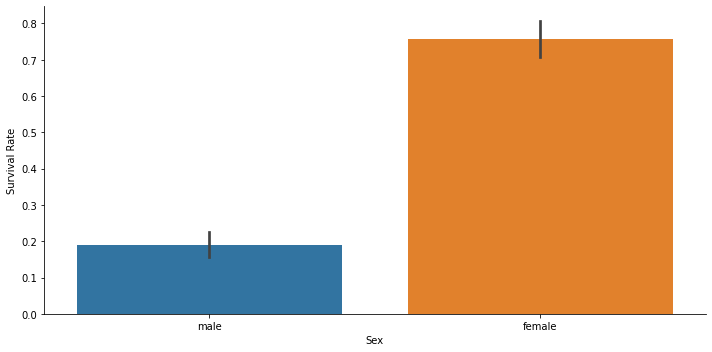

In [26]:
gender_impact = sns.catplot('Sex','Survived',data=df,kind='bar',aspect=2)
plt.ylabel("Survival Rate")
plt.show()

### Sex impact analysis: It looks like the female are more likely to survived (75.6%) compared to the male (19%), this may partly because lifeboats are given to the women and children first. 
( "Hadn't we better get the women and children into the boats, sir?" - Captain Smith)

## Survival Analysis by Social class 

In [27]:
# Create a cross table of the Pclass and Survived
print(pd.crosstab(df['Pclass'], df['Survived'], margins=True))

Survived    0    1  All
Pclass                 
1-pclass   70  130  200
2-pclass   94   80  174
3-pclass  337  114  451
All       501  324  825


In [28]:
# Create a cross table of the Pclass and Survived
print(pd.crosstab(df['Pclass'], df['Survived'], normalize='index'))

Survived         0         1
Pclass                      
1-pclass  0.350000  0.650000
2-pclass  0.540230  0.459770
3-pclass  0.747228  0.252772


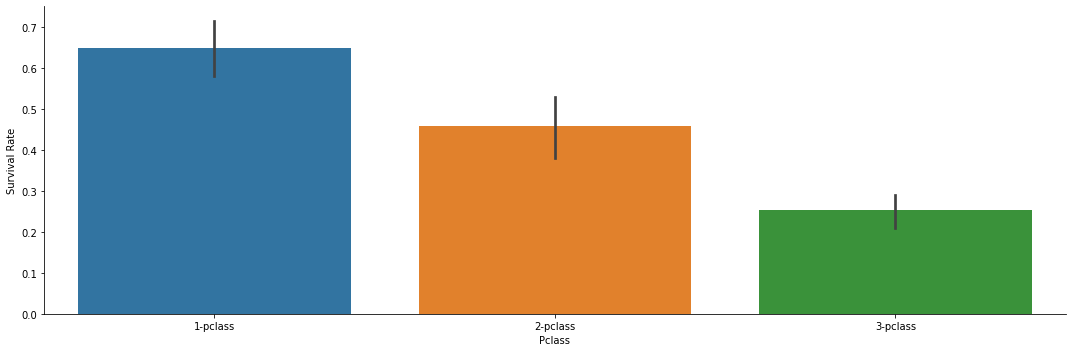

In [29]:
Pclass_impact = sns.catplot('Pclass','Survived',data=df,kind='bar',aspect=3 , order = ['1-pclass','2-pclass','3-pclass'])
plt.ylabel("Survival Rate")
plt.show()

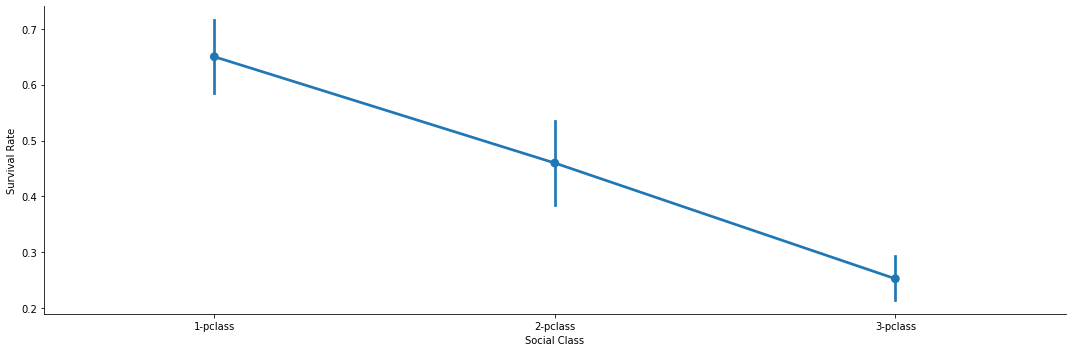

In [30]:
Pclass_impact = sns.catplot('Pclass','Survived',data = df, kind = 'point', aspect = 3,order = ['1-pclass','2-pclass','3-pclass'])
plt.ylabel("Survival Rate")
plt.xlabel("Social Class")
plt.show()

### Social class impact analysis: The 1st-class had the highest chance to survived (65%) compared to the the lowest chance of survival (25%).

## Survival Analysis by With Family or Travel Alone

In [31]:
df['With_Family'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']
df['With_Family'].loc[df['With_Family'] > 0] = 'Family'
df['With_Family'].loc[df['With_Family'] == 0] = 'Alone'

In [32]:
# Create a cross table of the With_Family and Survived
print(pd.crosstab(df['With_Family'], df['Survived'], margins=True))
# Create a cross table of the With_Family and Survived by percentage
print(pd.crosstab(df['With_Family'], df['Survived'], normalize='index'))

Survived       0    1  All
With_Family               
Alone        351  155  506
Family       150  169  319
All          501  324  825
Survived            0         1
With_Family                    
Alone        0.693676  0.306324
Family       0.470219  0.529781


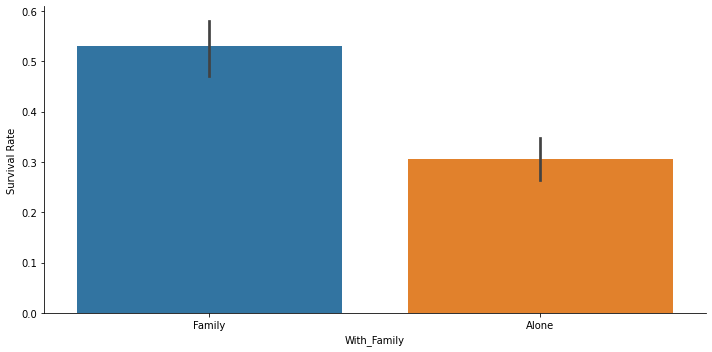

In [33]:
Family_impact = sns.catplot('With_Family','Survived',data=df,kind='bar',aspect=2)
plt.ylabel("Survival Rate")
plt.show()

### Travel with family impact analysis: It looks like people travelled with family are more likely to survive (53%) compared to the people travelled alone (31%)

# Task(3): What are some potential correlations in the dataset between these factors? How can we account for them?

## Correlations between Age and Gender with Survival

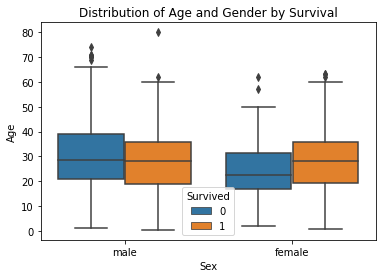

In [34]:
Age_Gender_Corr = sns.boxplot(data=df, x='Sex', y='Age',hue = 'Survived')
Age_Gender_Corr.set(title='Distribution of Age and Gender by Survival')
plt.show()

### Age_Gender_Corr: From the figure above, it shows that the order female group showed higher survival chance than the younger female group. For the male group, the trend is opposite.

## Correlations between Age and Social class with Survival

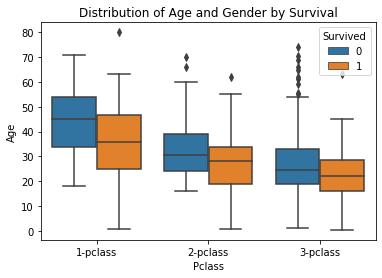

In [35]:
Age_Class_Corr = sns.boxplot(data=df, x='Pclass', y='Age',hue = 'Survived',order = ['1-pclass','2-pclass','3-pclass'])
Age_Class_Corr.set(title='Distribution of Age and Gender by Survival')
plt.show()

### Age_Class_Corr: From the figure above, it shows that the younger had a higher survival chance for all three classes.

## Correlations between Age and With_Family with Survival

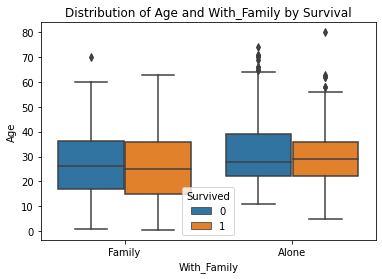

In [36]:
Age_Family_Corr = sns.boxplot(data=df, x='With_Family', y='Age',hue = 'Survived')
Age_Family_Corr.set(title='Distribution of Age and With_Family by Survival')
plt.show()

### Age_Family_Corr: From the figure above, it shows that there is no clear trend for the correlations between age and travel with family. For people who travel alone group, the younger people are more likely to survive than the elder.